# Extração de Características

Load

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']

y = np.array([0,1,2,3,4,5,6,7] * 99)

voluntarios = dict()
for v in range(10):
    voluntarios[v] = np.load(f'./datasets/caract_{v}.npy')


### Visualização

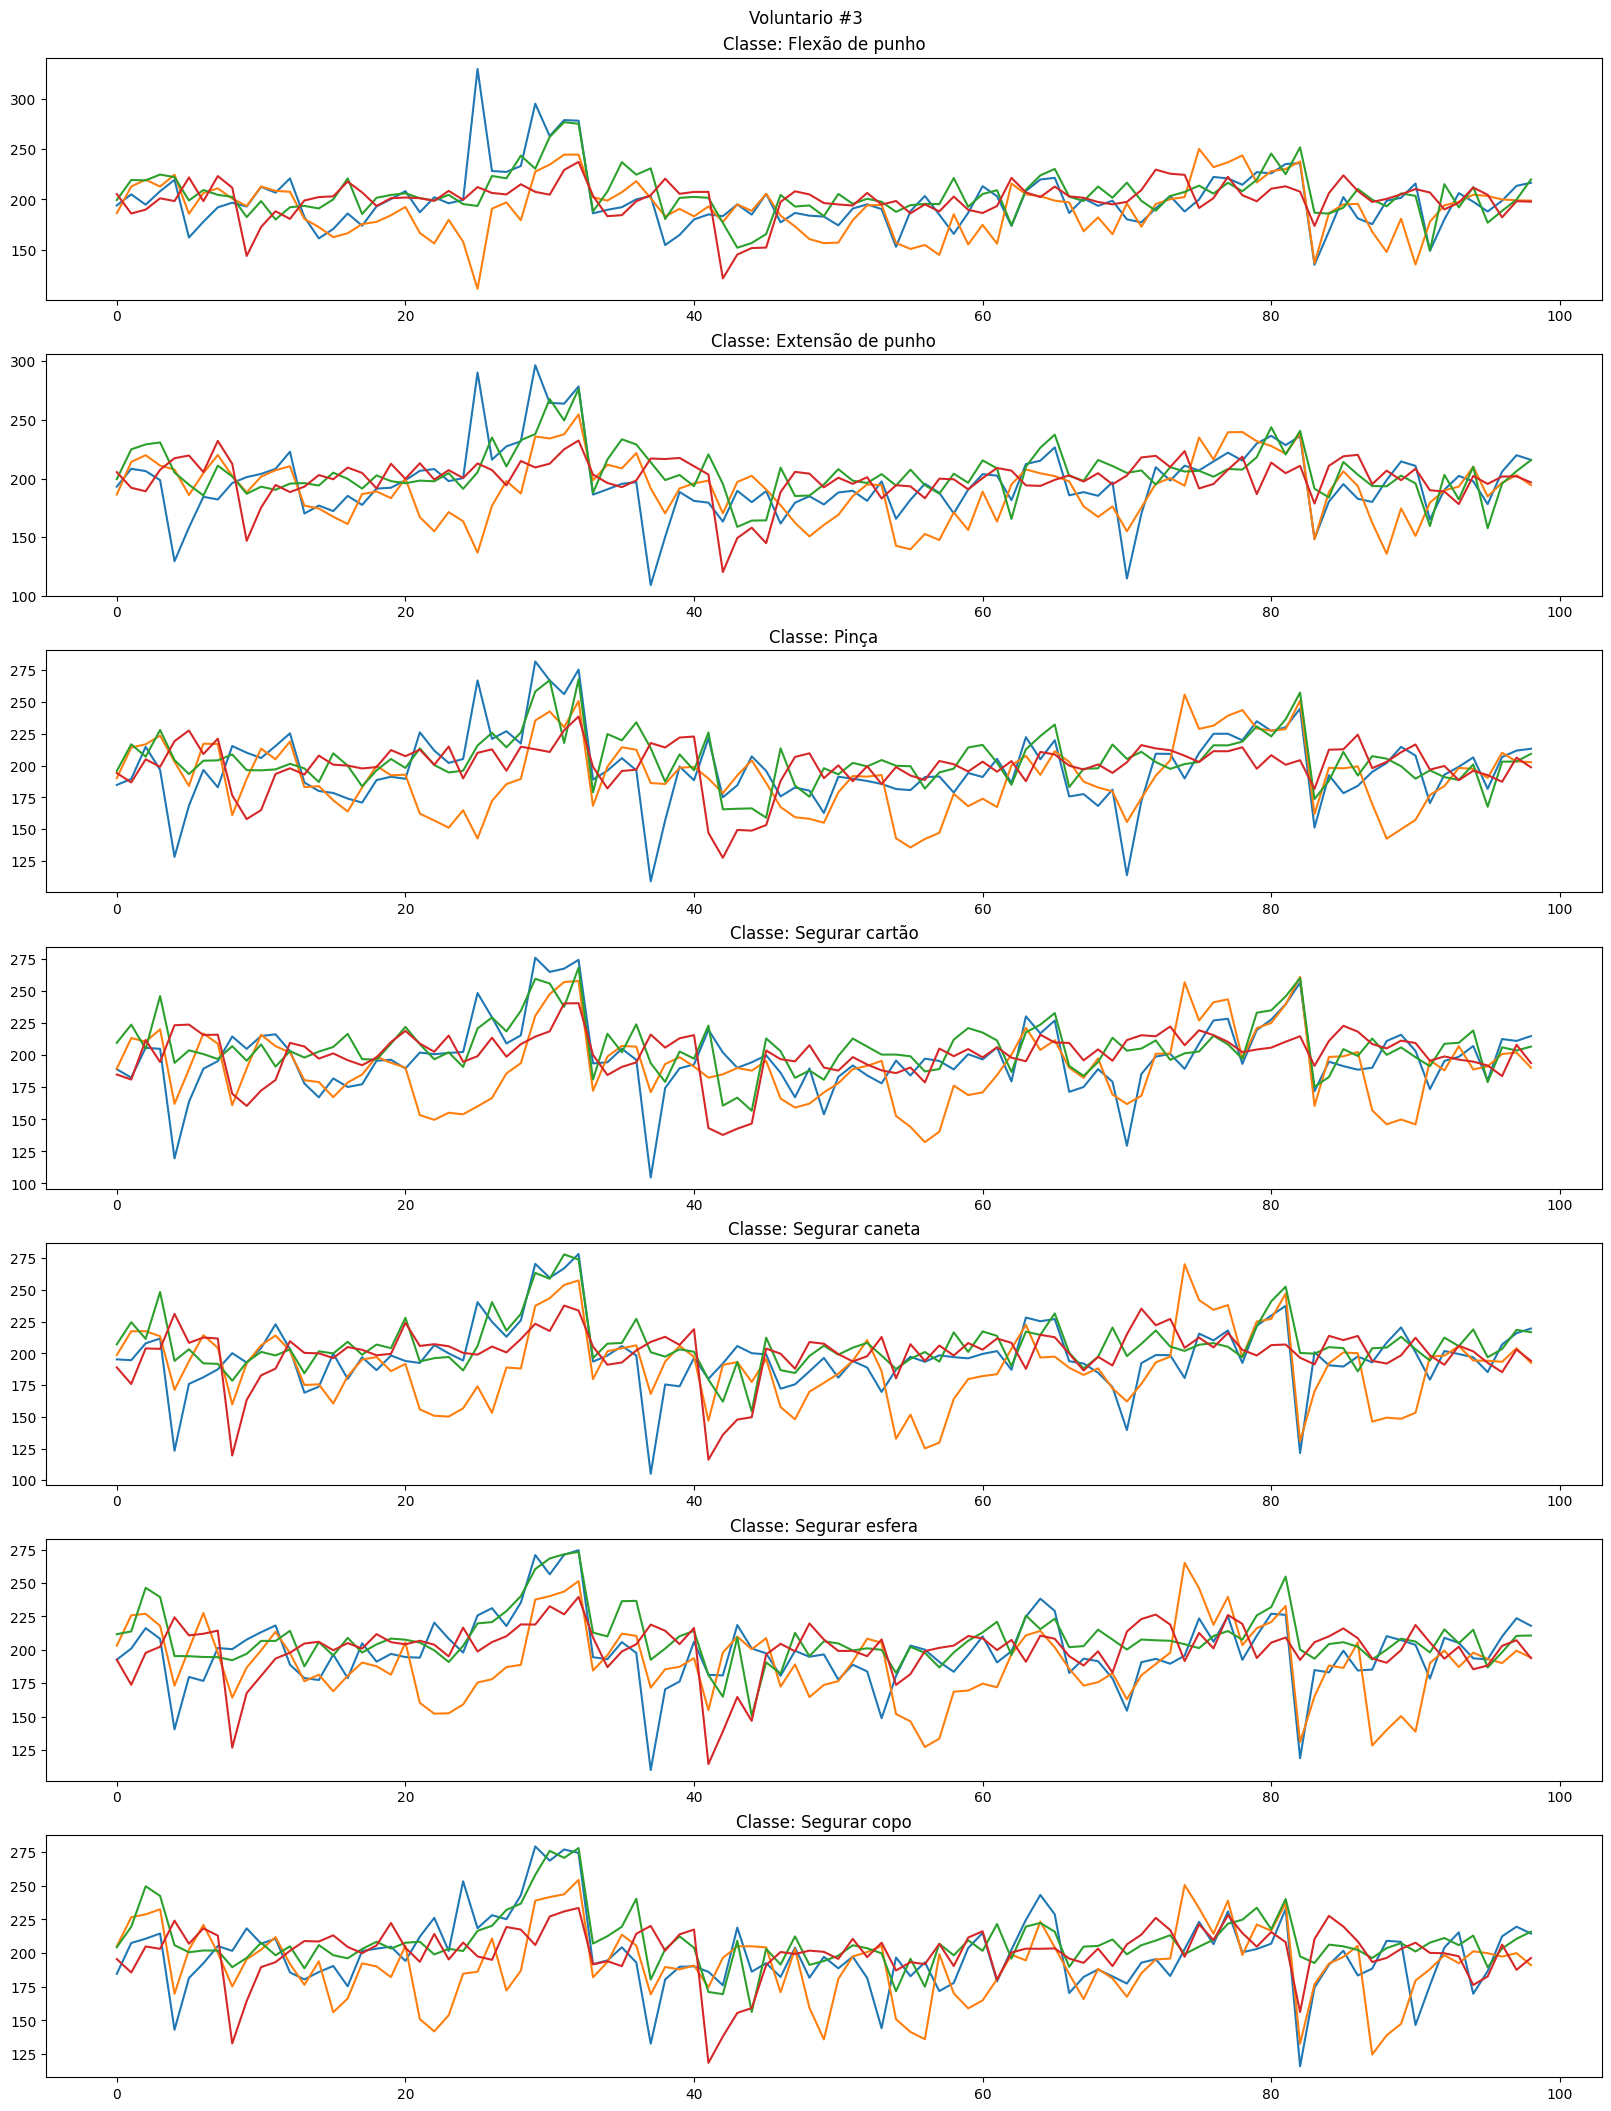

In [133]:
volN = 3
vol = voluntarios[volN]

subplts = 7
fig, ax = plt.subplots(subplts, 1, constrained_layout=True)
ax = ax if subplts > 1 else [ax]

rcParams['figure.figsize'] = [16., 3. * subplts]
fig.suptitle(f'Voluntario #{volN}')

for classe in range(subplts):
    # retira dos 792 instancias somente as que a classe for "Classe" (resulta em 99 instancias)
    data = np.array([vol[e,:] for e in range(classe, vol.shape[0], 8)])

    ax[classe].set_title(f'Classe: {protocol[classe]}')
    # testamos todas faixas de instâncias para descobrir qual seria a melhor e concluímos que seria 32:36
    # 13:17 também poderia ser uma boa faixa se não fosse pela grande diferença 
    ax[classe].plot(data[:, 32:36])

plt.show()


#coordenada X = instancias
#cores do grafico = atributos
#coordenada Y = valor que cada instancia possui em X para o atributo Cor

Pesquisar pelo menos 2 métodos de seleção automatizada de característica. Exceto o método RFE (recursive Feature Elimination): limita o SVM posteriormente a utilizar kernel não linear.


In [134]:
# VARIANCE THRESHOLD
from sklearn.feature_selection import VarianceThreshold
# X = data[:,32:36]
X = vol
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[7.60475276e-01, 7.84925678e-01, 4.68398598e-01, ...,
        2.51178496e+02, 3.20753096e-01, 1.40386011e-01],
       [8.11742245e-01, 7.27821279e-01, 5.42710831e-01, ...,
        8.33177240e+02, 2.03886521e+00, 7.90995698e-01],
       [8.18573291e-01, 8.55732121e-01, 4.82125839e-01, ...,
        1.12260631e+02, 7.73728741e-01, 6.06276590e-01],
       ...,
       [7.75159427e-01, 1.02081187e+00, 7.31632069e-01, ...,
        6.72874054e+00, 5.14370231e+00, 6.27936516e-01],
       [6.18628016e-01, 1.03009885e+00, 7.40208411e-01, ...,
        8.57207504e+00, 5.78842782e+00, 4.01692550e-01],
       [6.89259500e-01, 9.54075375e-01, 8.58409042e-01, ...,
        5.43360145e+00, 3.74500380e+00, 1.79810310e-01]])

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# X, y = load_iris(return_X_y=True)
# y = [0,1,2,3,4,5,6,7]
# X = data[:, 32:36]
y = np.array([0,1,2,3,4,5,6,7] * 99)
print(X.shape)
X_new = SelectKBest(f_classif, k=2).fit_transform(vol, y)
print(X_new.shape)

(792, 40)
(792, 2)


SVM

In [156]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = vol
# y = np.array([0,1,2,3,4,5,6,7] * 99)
y = [[str(i)] * int(X.shape[0] / 8) for i in range(8)]
y = np.array(y).flatten()

# Carregar os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Pré-processamento
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_transformed = sel.fit_transform(X_train)
X_test_transformed = sel.transform(X_test)

# Treinamento do SVM
clf = svm.SVC()
# clf.fit(X_train, y_train)
clf.fit(X_train_transformed, y_train)

# Previsões
y_pred = clf.predict(X_test_transformed)
# y_pred = clf.predict(X_test)

# Avaliação do desempenho
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average='macro')

# Exibir as métricas de desempenho
print("Acurácia:", accuracy)
print("Precisão:", precision)

Acurácia: 0.4327731092436975
Precisão: 0.49888250594342365
